In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests
import csv

In [454]:
headers = ({'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

prices_list = []
location_list = []
capacity_list = []
bedroom_num_list = []
bed_num_list = []
    
for i in range(0,1): # website did not allow a whole run. Needed to do by several steps and concat the data
    
    try:
        website = "https://www.escapadarural.com/casas-rurales?l=andalucia&page={}".format(str(i))
        source = requests.get(website, headers=headers).text
        html_soup = BeautifulSoup(source, 'lxml')
        house_containers = html_soup.find_all('article', class_="c-resultSnippet JS_resultSnippet")
    
    
        prices = html_soup.find_all('div', class_="c-price--average")  
        location = html_soup.find_all('h4', class_="c-h4--result")
        characteristics = html_soup.find_all('div', class_="c-result--items")

        for j in range(len(house_containers)):
            prices_list.append(prices[j].text.strip())
            location_list.append(location[j].text.strip())
            capacity_list.append(characteristics[j].div.find_next("div").find_next("div").find_next("div").text.strip())
            bedroom_num_list.append(characteristics[j].div.find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").text.strip())
            bed_num_list.append(characteristics[j].div.find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").find_next("div").text.strip())
            
    except IndexError:
        pass
        
house_features = (list(zip(prices_list, location_list, capacity_list, bedroom_num_list, bed_num_list)))

data = pd.DataFrame(house_features, columns =["price_day_person", "location", "capacity", "bedroom_num", "beds_num"])

data.to_csv("Df_rent_rural_andalucia.csv", index=False)

In [2]:
df1 = pd.read_csv("Df_rural_huesca_12-6.csv")

In [3]:
df2 = pd.read_csv("Df_rent_rural_cantabria.csv")

In [4]:
df3 = pd.read_csv("Df_rent_rural_navarra.csv")

In [5]:
df4 = pd.read_csv("Df_rent_rural_lerida.csv")

In [6]:
df5 = pd.read_csv("Df_rent_rural_vasco.csv")

In [7]:
df6 = pd.read_csv("Df_rent_rural_girona.csv")

In [8]:
df7 = pd.read_csv("Df_rent_rural_asturias.csv")

In [9]:
df8 = pd.read_csv("Df_rent_rural_galicia.csv")

In [10]:
df9 = pd.read_csv("Df_rent_rural_andalucia.csv")

In [11]:
df1["region"] = "Aragon"
df2["region"] = "Cantabria"
df3["region"] = "Navarra"
df4["region"] = "Lerida"
df5["region"] = "Pais Vasco"
df6["region"] = "Gerona"
df7["region"] = "Asturias"
df8["region"] = "Galicia"
df9["region"] = "Andalucia"

In [12]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

In [13]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
df.shape

(4527, 6)

In [15]:
df.drop_duplicates(keep=False,inplace=True) # watch-out with duplicate values after scrapping

In [16]:
df.shape

(4197, 6)

In [17]:
pd.set_option("display.max_rows", 90)

In [18]:
df["price_day_person"] = df["price_day_person"].str[:2]

In [19]:
df["capacity"] = df["capacity"].apply(lambda x: x if "personas" in x.lower() else np.nan)
df["bedroom_num"] = df["bedroom_num"].apply(lambda x: x if "dormitorios" in x.lower() else np.nan)
df["beds_num"] = df["beds_num"].apply(lambda x: x if "camas" in x.lower() else np.nan)

In [20]:
df.dropna(how="any", inplace=True)

In [21]:
df["capacity"] = df["capacity"].str.split(" p", expand=True)[0].str[-2:]

In [22]:
df["bedroom_num"] = df["bedroom_num"].str.split(" d", expand=True)[0]

In [23]:
df["beds_num"] = df["beds_num"].str.split(" c", expand=True)[0]

In [24]:
df["price_day_person"] = df["price_day_person"].str.replace("€", "")

In [25]:
df=df.astype({"price_day_person":int, "location":str, "capacity":int, "bedroom_num":int, "beds_num":int})

In [26]:
pivote = pd.pivot_table(df, index=["region"], values=["price_day_person","capacity","bedroom_num", "beds_num"], aggfunc=["mean","sem"]).reset_index()

In [27]:
pivote

region        mean                                                sem  \
              bedroom_num   beds_num   capacity price_day_person bedroom_num   
0   Andalucia    5.794218  11.009354  13.822279        22.426871    0.119433   
1      Aragon    5.685714  11.021429  13.560714        22.392857    0.318855   
2    Asturias    5.700000   9.600000  12.762500        22.664286    0.197638   
3   Cantabria    6.629344  12.266409  15.223938        24.092664    0.296448   
4     Galicia    5.277372   8.722628  12.375912        25.306569    0.194677   
5      Gerona    6.062992  12.139108  15.813648        29.687664    0.166310   
6      Lerida    5.548387  10.737903  13.596774        27.947581    0.218833   
7     Navarra    5.628205  10.660256  13.032051        22.945513    0.203463   
8  Pais Vasco    5.544643  10.875000  13.571429        29.125000    0.218177   

                                        
   beds_num  capacity price_day_person  
0  0.265960  0.261366         0.193002  
1  0.613739  0.647862         0.345900  
2  0.303150  0.401113         0.286153  
3  0.614499  0.582447         0.480872  
4  0.338854  0.447779         0.448137  
5  0.375864  0.486208         0.468041  
6  0.433361  0.486961         0.523640  
7  0.407111  0.460109         0.350319  
8  0.491256  0.551661         0.768919

In [28]:
pivote.columns

MultiIndex([('region',                 ''),
            (  'mean',      'bedroom_num'),
            (  'mean',         'beds_num'),
            (  'mean',         'capacity'),
            (  'mean', 'price_day_person'),
            (   'sem',      'bedroom_num'),
            (   'sem',         'beds_num'),
            (   'sem',         'capacity'),
            (   'sem', 'price_day_person')],
           )

In [29]:
pivote

region        mean                                                sem  \
              bedroom_num   beds_num   capacity price_day_person bedroom_num   
0   Andalucia    5.794218  11.009354  13.822279        22.426871    0.119433   
1      Aragon    5.685714  11.021429  13.560714        22.392857    0.318855   
2    Asturias    5.700000   9.600000  12.762500        22.664286    0.197638   
3   Cantabria    6.629344  12.266409  15.223938        24.092664    0.296448   
4     Galicia    5.277372   8.722628  12.375912        25.306569    0.194677   
5      Gerona    6.062992  12.139108  15.813648        29.687664    0.166310   
6      Lerida    5.548387  10.737903  13.596774        27.947581    0.218833   
7     Navarra    5.628205  10.660256  13.032051        22.945513    0.203463   
8  Pais Vasco    5.544643  10.875000  13.571429        29.125000    0.218177   

                                        
   beds_num  capacity price_day_person  
0  0.265960  0.261366         0.193002  
1  0.613739  0.647862         0.345900  
2  0.303150  0.401113         0.286153  
3  0.614499  0.582447         0.480872  
4  0.338854  0.447779         0.448137  
5  0.375864  0.486208         0.468041  
6  0.433361  0.486961         0.523640  
7  0.407111  0.460109         0.350319  
8  0.491256  0.551661         0.768919

In [30]:
pivote.columns =  ["region", "bedroom_num", "beds_num", "capacity", "price_day_person", "bedroom_num_sem", "beds_num_sem","capacity_sem", "price_day_person_sem"] # renaming columns

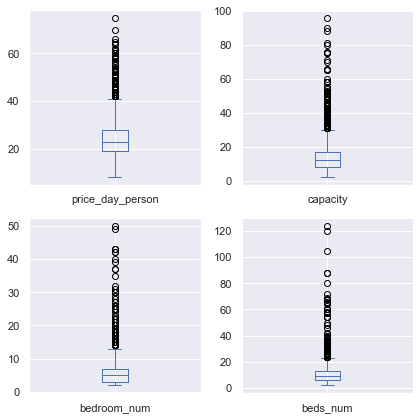

In [31]:
# outliers?
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6,6), color="b")
plt.tight_layout()
# plt.savefig("boxplots", dpi=400)
plt.show()

In [32]:
df = df.reset_index().drop("index", axis=1)

In [33]:
df.describe()

price_day_person     capacity  bedroom_num     beds_num
count       3602.000000  3602.000000  3602.000000  3602.000000
mean          24.201277    13.746807     5.781233    10.774014
std            7.620750     9.000711     4.097317     8.233203
min            8.000000     2.000000     2.000000     2.000000
25%           19.000000     8.000000     3.000000     6.000000
50%           23.000000    12.000000     5.000000     9.000000
75%           28.000000    17.000000     7.000000    13.000000
max           75.000000    96.000000    50.000000   124.000000

In [34]:
df_num = df.select_dtypes(include=["int32", "float64"])

In [35]:
print("Skewness")
for i in df_num.columns:
    print("{}:".format(i), df[i].skew()) 

Skewness
price_day_person: 1.4588609532579002
capacity: 2.6013548143335887
bedroom_num: 3.7174634957350063
beds_num: 4.31336053211737


In [36]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

print("Skewness")

for i in df_num.columns:
    print("{} sqrt transformed:".format(i), np.sqrt(df[i]).skew())
    
print("====================================================")

for i in df_num.columns:
    print("{} boxcox transformed:".format(i), boxcox(df[i],0).skew())

Skewness
price_day_person sqrt transformed: 0.8219666612383667
capacity sqrt transformed: 1.2066714091766728
bedroom_num sqrt transformed: 1.7098767483570438
beds_num sqrt transformed: 1.6029857223643058
price_day_person boxcox transformed: 0.2566460441747172
capacity boxcox transformed: 0.2656338961556168
bedroom_num boxcox transformed: 0.5375301179505377
beds_num boxcox transformed: 0.28267586526583727


In [37]:
df_num_sqrt = pd.DataFrame()
df_num_boxcox = pd.DataFrame()

In [38]:
for i in df_num.columns:
    df_num_sqrt[i] = np.sqrt(df[i])
    
for i in df_num.columns:
    df_num_boxcox[i] = boxcox(df[i],0)

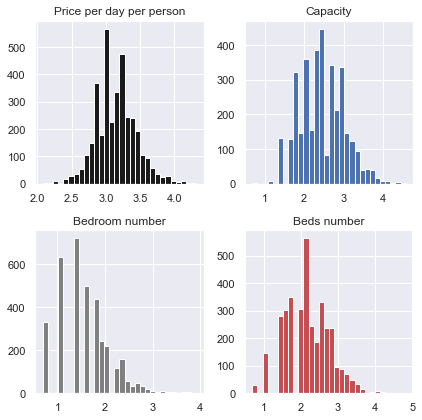

In [39]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(6,6))

ax1.hist(df_num_boxcox["price_day_person"],color="k", bins=30)
ax1.set_title("Price per day per person")
ax2.hist(df_num_boxcox["capacity"],color="b", bins=30)
ax2.set_title("Capacity")
ax3.hist(df_num_boxcox["bedroom_num"],color="grey", bins=30)
ax3.set_title("Bedroom number")
ax4.hist(df_num_boxcox["beds_num"],color="r", bins=30)
ax4.set_title("Beds number")

plt.tight_layout()
# plt.savefig("hist_no_transformation.png", dpi=400)
plt.show()

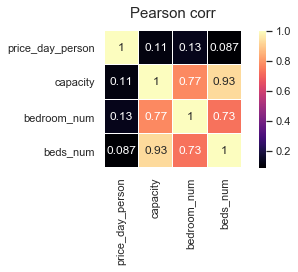

In [40]:
colormap=plt.cm.magma
plt.title("Pearson corr", y=1.05, size=15)
sns.heatmap(df_num_boxcox.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)
# plt.savefig("corr.png", dpi=400)
plt.tight_layout()
plt.show()

In [41]:
df

price_day_person                    location  capacity  bedroom_num  \
0                   51                   Belsierre        71           29   
1                   18                     Panzano        22            9   
2                   19                   Saravillo        30           15   
3                   30                     Boltaña        17            6   
4                   29                    Escalona        96           40   
...                ...                         ...       ...          ...   
3597                34  El Castillo de las Guardas        12            5   
3598                37                     Andújar         7            4   
3599                21  El Castillo de las Guardas        13            5   
3600                21         Fuensanta de Martos         5            3   
3601                29                       Álora         5            3   

      beds_num     region  
0           54     Aragon  
1           18     Aragon  
2           25     Aragon  
3           14     Aragon  
4           69     Aragon  
...        ...        ...  
3597        12  Andalucia  
3598         5  Andalucia  
3599        12  Andalucia  
3600         5  Andalucia  
3601         4  Andalucia  

[3602 rows x 6 columns]

In [42]:
pivote.sort_values("price_day_person", inplace=True)

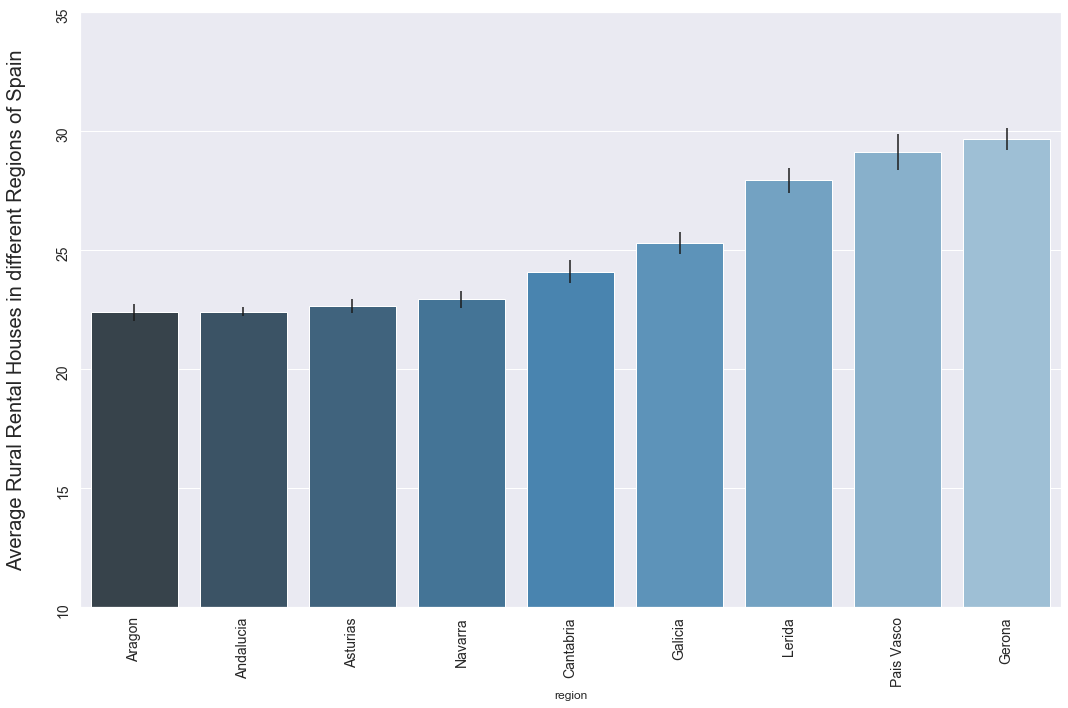

In [43]:
plt.rcParams["figure.figsize"] = (15,10)
sns.barplot(x=pivote["region"],y=pivote["price_day_person"], data=pivote, yerr=pivote["price_day_person_sem"], palette="Blues_d")
plt.ylabel("Average Rural Rental Houses in different Regions of Spain", fontsize=20, labelpad=30)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=14)
plt.ylim(10,35)
plt.tight_layout()
plt.savefig("Huesca_rent_price.png", dpi=400)
plt.show()

In [44]:
len(df["region"].unique())

9

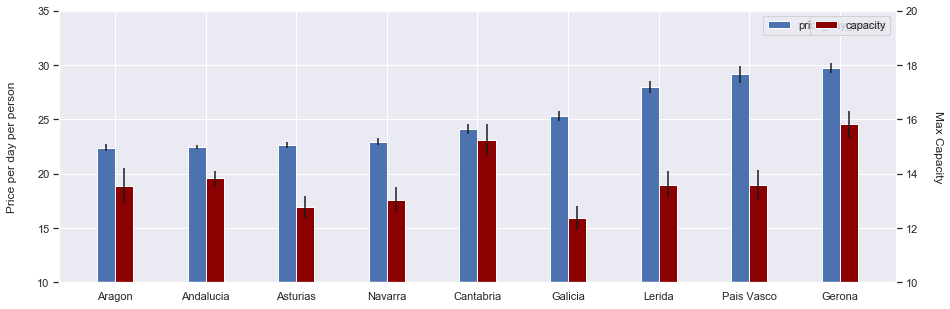

In [45]:

xx = np.arange(len(df["region"].unique()))
ticks_x = list(pivote["region"].unique())

fig, ax1 = plt.subplots(1,figsize=(15,5))
ax1.bar(xx-0.1, pivote["price_day_person"] , width=0.20, color='b', align="center", yerr=pivote["price_day_person_sem"], label="price_day_person")
ax2.set_ylabel('capacity')
ax1.set(ylim=(10,35))
ax1.set_ylabel('Price per day per person', labelpad=20)
ax1.legend()

ax2 = ax1.twinx() 
ax2.set_ylabel('Max Capacity', rotation=270, labelpad=25)
ax2.set(ylim=(10,20))
ax2.grid(False) # Removes the grid from the second plot
ax2.bar(xx+0.1, pivote["capacity"], width=0.20, color='darkred', align="center", yerr=pivote["capacity_sem"], label="capacity")
ax2.legend()
plt.xticks(ticks=xx,labels=ticks_x, rotation=45)
plt.savefig("barstack.png", dpi=400)
plt.show()

In [46]:
# If we want to get a general idea of produc performance before model tunning, do this:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
kfold = KFold(n_splits=10, random_state=seed)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

IndentationError: expected an indented block (<ipython-input-46-cca1d88faf09>, line 14)

In [ ]:
# Next, we can select the model and tune the model with GridSearchCV. For instance LogisticRegression()

from sklearn.model_selection import GridSearchCV #This will take a while to run
parameters = {'n_estimators': range(10,300,10), "criterion": ("mse","mae"), "max_features":("auto","sqrt","log2")} 
gs=GridSearchCV(LogisticRegression(),parameters, scoring="neg_mean_absolute_error", cv=3)
gs.fit(x_train, y_train)
